In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [2]:
df = pd.read_csv(r"C:\Users\kumar\Downloads\combined.csv",parse_dates=['trans_date_trans_time','dob'])

C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '17-02-1986' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15-09-1988' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '28-10-1960' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '28-07-1958' in DD/MM/YYYY format. Provide format or specif

In [3]:
## Checking for rows and columns ##
df.shape


(1048575, 24)

In [4]:
## First 5 rows of the data ##
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,Urban/ Suburban,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1017,2019-01-01 12:47:00,6.041621e+10,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,Suburban,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,98e3dcf98101146a577f85a34e58feec,1325422035,43.974711,-109.741904,0
1,2724,2019-02-01 08:44:00,6.041621e+10,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,Suburban,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,498120fc45d277f7c88e3dba79c33865,1325493897,42.018766,-109.044172,0
2,2726,2019-02-01 08:47:00,6.041621e+10,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,Suburban,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,95f514bb993151347c7acdf8505c3d62,1325494056,42.961335,-109.157564,0
3,2882,2019-02-01 12:38:00,6.041621e+10,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,Suburban,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,4f0c1a14e0aa7eb56a490780ef9268c5,1325507894,42.228227,-108.747683,0
4,2907,2019-02-01 13:10:00,6.041621e+10,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,Suburban,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,3b2ebd3af508afba959640893e1e82bc,1325509846,43.321745,-108.091143,0


In [5]:
##Last 5 rows of the data##
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,Urban/ Suburban,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1048570,1044863,2020-09-03 13:18:00,4.990000e+18,fraud_Pollich LLC,home,5.29,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,Suburban,IL,61335,41.173,-89.2187,532,Audiological scientist,1956-09-01,516c59bcae00174c6c6b405c250f18b4,1362835089,40.626013,-88.741467,0
1048571,1045758,2020-09-03 18:24:00,4.990000e+18,fraud_Frami Group,entertainment,165.98,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,Suburban,IL,61335,41.173,-89.2187,532,Audiological scientist,1956-09-01,8b4a2a1e89a88f74ac46249b357cda23,1362853465,41.064324,-89.269977,0
1048572,1046793,2020-10-03 00:56:00,4.990000e+18,"fraud_Ferry, Lynch and Kautzer",misc_net,17.52,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,Suburban,IL,61335,41.173,-89.2187,532,Audiological scientist,1956-09-01,5cf7bd5b13d7fa5cfffbda859d85783a,1362876979,40.445215,-88.425448,0
1048573,1046971,2020-10-03 02:45:00,4.990000e+18,"fraud_Swaniawski, Lowe and Robel",shopping_pos,3.54,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,Suburban,IL,61335,41.173,-89.2187,532,Audiological scientist,1956-09-01,cd509977d9b3b83d13eeed6576a6ed4a,1362883539,41.562968,-88.428600,0
1048574,1047587,2020-10-03 08:58:00,4.990000e+18,"fraud_Ferry, Lynch and Kautzer",misc_net,16.20,Benjamin,Kim,M,920 Patrick Light,Mc Nabb,Suburban,IL,61335,41.173,-89.2187,532,Audiological scientist,1956-09-01,ae44c1465f2707719701342cb8f3fb91,1362905882,40.548748,-89.058169,0


In [6]:

## checking columns ##
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'Urban/ Suburban',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [7]:
## Data types of each row ##
df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
Urban/ Suburban                  object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [8]:
## Basic stats ##
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03
std,3.026977e+05,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,2.621435e+05,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00
50%,5.242870e+05,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00
75%,7.864305e+05,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00
max,1.048574e+06,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
## Checking unique values for object data type columns ##

for col in df.select_dtypes(include = 'object').columns:
    print(f"col_names: {col}")
    print(f"Number of Unique Values: {df[col].nunique()}")

col_names: merchant
Number of Unique Values: 693
col_names: category
Number of Unique Values: 14
col_names: first
Number of Unique Values: 348
col_names: last
Number of Unique Values: 479
col_names: gender
Number of Unique Values: 2
col_names: street
Number of Unique Values: 965
col_names: city
Number of Unique Values: 879
col_names: Urban/ Suburban
Number of Unique Values: 2
col_names: state
Number of Unique Values: 51
col_names: job
Number of Unique Values: 493
col_names: trans_num
Number of Unique Values: 1048575


In [10]:

## Checking categories for category, gender and is_fraud(1=fraud,0=no fraud)columns ###


objectcolcat1 = df['category'].value_counts(ascending=True)
objectcolcat2 = df['gender'].value_counts(ascending=True)
objectcolcat3 = df['is_fraud'].value_counts(ascending=True)
print(objectcolcat1)
print(objectcolcat2)
print(objectcolcat3)



travel             32830
grocery_net        36719
misc_net           51082
misc_pos           64492
health_fitness     69362
personal_care      73498
food_dining        74041
entertainment      75981
shopping_net       78899
kids_pets          91404
shopping_pos       94353
home               99578
grocery_pos        99906
gas_transport     106430
Name: category, dtype: int64
M    474607
F    573968
Name: gender, dtype: int64
1       6006
0    1042569
Name: is_fraud, dtype: int64


In [11]:
## checking for null values ##

df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
Urban/ Suburban          0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
## checking duplicates ##

print(df.duplicated().any())
print(df.duplicated().sum())
(df[df.duplicated(keep=False)])

False
0


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,Urban/ Suburban,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [13]:
## Single value columns ##

def get_single_value_cols(df):
    '''Returns list of columns that contain only one value'''
    
    single_val_cols = []
    for col in df.columns:
        if len(df[col].unique()) == 1:
            single_val_cols.append(col)
            
    return single_val_cols

print(get_single_value_cols(df))

[]


In [14]:
## Mixed data types columns ##

def get_column_data_types(df):
    """Returns a dictionary of each column listing the data types within the column"""
    
    multiple_types = {}
    
    for col in df.columns:
        types_df = df[col].dropna().apply(lambda x: x.__class__).value_counts()
        if types_df.shape[0] > 1:
            multiple_types[col] = types_df.index.values.tolist()
      
    return multiple_types


def has_multi_types_within_col(df):   
    """Returns True if any column in the df has multiple data types within the column"""
    
    return len(get_column_data_types(df).keys()) > 0

print(has_multi_types_within_col(df))

False


In [15]:
## checking for Outliers ##

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# define a function to count outliers using IQR method
def count_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df < lower_bound) | (df > upper_bound)]
    return outliers.count()

# create an empty dictionary to store the outlier counts
outlier_counts = {}

# count outliers for each numeric column in the dataset
for col in numeric_cols:
    outlier_counts[col] = count_outliers(df[col])

# print outlier counts for each numeric column
for col, count in outlier_counts.items():
    print(f"Number of outliers in {col}: {count}")
    

Number of outliers in Unnamed: 0: 0
Number of outliers in cc_num: 96046
Number of outliers in amt: 54542
Number of outliers in zip: 0
Number of outliers in lat: 3744
Number of outliers in long: 40346
Number of outliers in city_pop: 196602
Number of outliers in unix_time: 0
Number of outliers in merch_lat: 3975
Number of outliers in merch_long: 33842
Number of outliers in is_fraud: 6006


In [16]:
## Feature engineering ##

In [17]:
## dummy variables for gender and category ## 
df =pd.get_dummies(df,columns=['gender'])
df =pd.get_dummies(df,columns=['category'])



In [18]:
## Binning and encoding on State 
print(df['state'].unique())

df['state']=df['state'].replace(['WA', 'ID', 'MT', 'ND', 'MN', 'WI', 'MI', 'WY', 'NE', 'IA', 'IL','IN', 'OH', 'PA', 'NY', 'VT', 'NH', 'ME'], 'North')
df['state']=df['state'].replace(['TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'WV', 'VA', 'NC', 'SC', 'GA', 'FL'], 'South')
df['state']=df['state'].replace(['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA','DE', 'MD','DC'], 'East')
df['state']=df['state'].replace(['AK', 'HI', 'CA', 'OR', 'WA',' NV', 'UT', 'AZ', 'CO', 'NM', 'WY', 'MT', 'ND', 'SD'], 'West')
df['state']=df['state'].replace(['KS','MO','NV'], 'Central')

df =pd.get_dummies(df,columns=['state'])

['WY' 'SC' 'NC' 'TX' 'OK' 'MS' 'AR' 'PA' 'AK' 'CA' 'KS' 'MO' 'AL' 'NY'
 'CT' 'OH' 'VA' 'FL' 'SD' 'IN' 'DC' 'ME' 'OR' 'NE' 'ND' 'GA' 'TN' 'MI'
 'KY' 'IA' 'NH' 'UT' 'IL' 'WI' 'WA' 'WV' 'MN' 'LA' 'CO' 'NJ' 'NV' 'NM'
 'ID' 'MD' 'MA' 'AZ' 'DE' 'MT' 'VT' 'RI' 'HI']


In [19]:
# Create the 'Transaction_suburban' variable
df['Transaction_suburban'] = np.where(df['Urban/ Suburban'] == 'Suburban', df['amt'], 0)

# Create the 'Transaction_urban' variable
df['Transaction_urban'] = np.where(df['Urban/ Suburban'] == 'Urban', df['amt'], 0)

## dummy variables for urban/suburban ##
df =pd.get_dummies(df,columns=['Urban/ Suburban'])

In [20]:
## Performing Binning and encoding on city_pop ## 

import pandas as pd



# Calculate the range of values in the column
min_val = df['city_pop'].min()
max_val = df['city_pop'].max()

# Define the number of bins and bin size
num_bins = 2
bin_size = (max_val - min_val) / num_bins

# Create the bins
bins = [min_val + i*bin_size for i in range(num_bins+1)]

# Assign labels to the bins
labels = ['low','high']

# Bin the column values
df['population_category'] = pd.cut(df['city_pop'], bins=bins, labels=labels)

# View the binned data
(df.head(2))

## Creating dummy variables for population_category ## 
df =pd.get_dummies(df,columns=['population_category'])


In [21]:
## df2 contains data of only 4 categories ## 

In [22]:
df2 = pd.read_csv(r"C:\Users\kumar\Downloads\combined.csv",parse_dates=['trans_date_trans_time','dob'])

C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '17-02-1986' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15-09-1988' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '28-10-1960' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kumar\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '28-07-1958' in DD/MM/YYYY format. Provide format or specif

In [23]:
## dummy variables for gender and category ## 
df2 =pd.get_dummies(df2,columns=['gender'])
df2 =pd.get_dummies(df2,columns=['category'])



In [24]:
# Create the 'Transaction_suburban' variable
df2['Transaction_suburban'] = np.where(df2['Urban/ Suburban'] == 'Suburban', df2['amt'], 0)

# Create the 'Transaction_urban' variable
df2['Transaction_urban'] = np.where(df2['Urban/ Suburban'] == 'Urban', df2['amt'], 0)

## dummy variables for urban/suburban ##
##df2 =pd.get_dummies(df2,columns=['Urban/ Suburban'])

In [25]:
import pandas as pd



# Calculate the range of values in the column
min_val = df2['city_pop'].min()
max_val = df2['city_pop'].max()

# Define the number of bins and bin size
num_bins = 2
bin_size = (max_val - min_val) / num_bins

# Create the bins
bins = [min_val + i*bin_size for i in range(num_bins+1)]

# Assign labels to the bins
labels = ['low','high']

# Bin the column values
df2['population_category'] = pd.cut(df2['city_pop'], bins=bins, labels=labels)

# View the binned data
(df2.head(2))



,Unnamed: 0,trans_date_trans_time,cc_num,merchant,amt,first,last,street,city,Urban/ Suburban,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,gender_F,gender_M,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,Transaction_suburban,Transaction_urban,population_category
0,1017,2019-01-01 12:47:00,6.041621e+10,"fraud_Jones, Sawayn and Romaguera",7.27,Mary,Diaz,9886 Anita Drive,Fort Washakie,Suburban,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,98e3dcf98101146a577f85a34e58feec,1325422035,43.974711,-109.741904,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7.27,0.0,low
1,2724,2019-02-01 08:44:00,6.041621e+10,fraud_Berge LLC,52.94,Mary,Diaz,9886 Anita Drive,Fort Washakie,Suburban,WY,82514,43.0048,-108.8964,1645,Information systems manager,1986-02-17,498120fc45d277f7c88e3dba79c33865,1325493897,42.018766,-109.044172,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,52.94,0.0,low


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 41 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   Unnamed: 0               1048575 non-null  int64         
 1   trans_date_trans_time    1048575 non-null  datetime64[ns]
 2   cc_num                   1048575 non-null  float64       
 3   merchant                 1048575 non-null  object        
 4   amt                      1048575 non-null  float64       
 5   first                    1048575 non-null  object        
 6   last                     1048575 non-null  object        
 7   street                   1048575 non-null  object        
 8   city                     1048575 non-null  object        
 9   Urban/ Suburban          1048575 non-null  object        
 10  state                    1048575 non-null  object        
 11  zip                      1048575 non-null  int64         
 12  

In [27]:
## H1 The dollar amount for fraud transactions is higher than non-fraud transactions in Suburban and Urban areas ##

In [30]:
mean_df2 = df2.groupby(['is_fraud', 'Urban/ Suburban'])['amt'].mean()
print(mean_df2)

median_df2 = df2.groupby(['is_fraud', 'Urban/ Suburban'])['amt'].median()
print(median_df2)



is_fraud  Urban/ Suburban
0         Suburban            67.573670
          Urban               69.543801
1         Suburban           530.881320
          Urban              519.179937
Name: amt, dtype: float64
is_fraud  Urban/ Suburban
0         Suburban            47.310
          Urban               43.870
1         Suburban           394.895
          Urban              342.250
Name: amt, dtype: float64


In [31]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df2['is_fraud'], df2['Urban/ Suburban'])

# Print the contingency table
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistic and p-value
print("Chi-square test statistic:", chi2)
print("P-value:", p)

Urban/ Suburban  Suburban  Urban
is_fraud                        
0                 1014112  28457
1                    5848    158
Chi-square test statistic: 0.18397421415135667
P-value: 0.6679798772945711


In [32]:
dummies = pd.get_dummies(df2['Urban/ Suburban'])

# Add the dummy variables to the original DataFrame
df2 = pd.concat([df2, dummies], axis=1)

In [33]:

## logistic regression ## 


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import numpy as np


XB = df2[['Urban','Suburban','category_entertainment','category_shopping_pos']]


# Print the resulting DataFrame
print(df)
# Define the outcome variable
yB = df2[['is_fraud']]

XB_train, XB_test, yB_train, yB_test = train_test_split( XB, yB, test_size=0.30, random_state=185)

smote = SMOTE()
XB_train_resampled, yB_train_resampled = smote.fit_resample(XB_train, yB_train)
model11 = sm.Logit(yB_train_resampled, XB_train_resampled).fit()

report = model11.summary()

print(report)

model = LogisticRegression()
model.fit(XB_train_resampled, yB_train_resampled)

# make predictions on test data
y_pred = model.predict(XB_test)





# generate classification report
print(classification_report(yB_test, y_pred))

# generate ROC curve and calculate AUC score
y_prob = model.predict_proba(XB_test)[:, 1]
fpr, tpr, thresholds = roc_curve(yB_test, y_prob)
auc = roc_auc_score(yB_test, y_prob)

# plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(yB_test, y_pred)
print(cm)

         Unnamed: 0 trans_date_trans_time        cc_num  \
0              1017   2019-01-01 12:47:00  6.041621e+10   
1              2724   2019-02-01 08:44:00  6.041621e+10   
2              2726   2019-02-01 08:47:00  6.041621e+10   
3              2882   2019-02-01 12:38:00  6.041621e+10   
4              2907   2019-02-01 13:10:00  6.041621e+10   
...             ...                   ...           ...   
1048570     1044863   2020-09-03 13:18:00  4.990000e+18   
1048571     1045758   2020-09-03 18:24:00  4.990000e+18   
1048572     1046793   2020-10-03 00:56:00  4.990000e+18   
1048573     1046971   2020-10-03 02:45:00  4.990000e+18   
1048574     1047587   2020-10-03 08:58:00  4.990000e+18   

                                  merchant     amt     first  last  \
0        fraud_Jones, Sawayn and Romaguera    7.27      Mary  Diaz   
1                          fraud_Berge LLC   52.94      Mary  Diaz   
2                       fraud_Luettgen PLC   82.08      Mary  Diaz   
3          

Optimization terminated successfully.
         Current function value: 0.688104
         Iterations 5


LinAlgError: Singular matrix

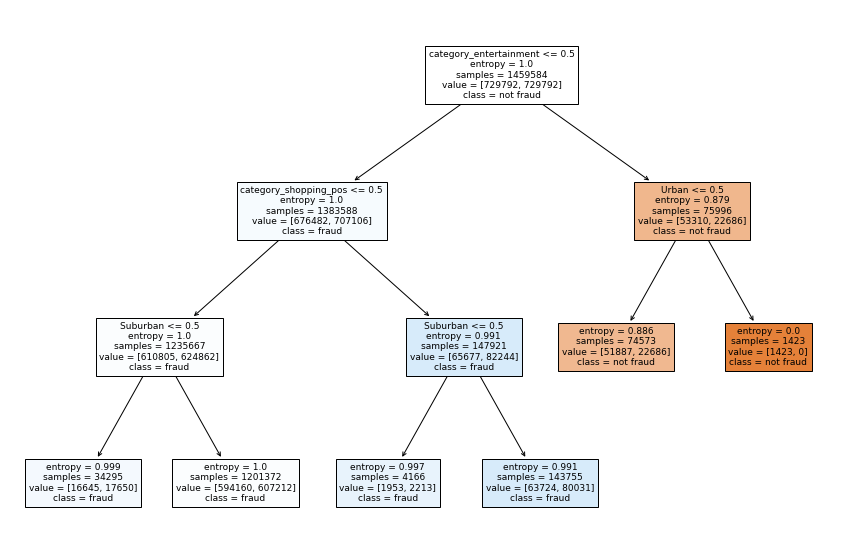

In [34]:
## decision tree ## 
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Fit the decision tree classifier
clf = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
clf.fit(XB_train_resampled,yB_train_resampled)

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=XB.columns, class_names=['not fraud', 'fraud'], filled=True)
plt.show()

In [144]:
## H2 : The average amount lost in fraud transactions is significantly higher than non-fraud transaction amount  in specific category than all other categories# 


In [35]:

## Mean and median calculations ##

mean_df2 = df2.groupby(['is_fraud', 'category_shopping_pos'])['amt'].mean()
mean_df2 = mean_df2.xs(1, level='category_shopping_pos')
print(mean_df2)

mean_df2 = df2.groupby(['is_fraud', 'category_shopping_net'])['amt'].mean()
mean_df2 = mean_df2.xs(1, level='category_shopping_net')
print(mean_df2)

median_df2 = df2.groupby(['is_fraud', 'category_shopping_pos'])['amt'].median()
median_df2 = median_df2.xs(1, level='category_shopping_pos')
print(median_df2)

median_df2 = df2.groupby(['is_fraud', 'category_shopping_net'])['amt'].median()
median_df2 = median_df2.xs(1, level='category_shopping_net')
print(median_df2)

is_fraud
0     73.652072
1    877.909849
Name: amt, dtype: float64
is_fraud
0      72.296751
1    1000.046989
Name: amt, dtype: float64
is_fraud
0      7.700
1    867.245
Name: amt, dtype: float64
is_fraud
0      8.295
1    997.290
Name: amt, dtype: float64


In [36]:
## chi-square test and contengency table ##

from scipy.stats import chi2_contingency

# create a contingency table of the counts
contingency_table = pd.pivot_table(df2, index='category_shopping_pos', columns='category_shopping_net', values='amt', aggfunc='count', fill_value=0)

print(contingency_table)


# conduct the chi-square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print the results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)
print("Expected counts:", expected)


category_shopping_net       0      1
category_shopping_pos               
0                      875323  78899
1                       94353      0
Chi-square statistic: 8435.085025468672
Degrees of freedom: 1
p-value: 0.0
Expected counts: [[882422.49917459  71799.50082541]
 [ 87253.50082541   7099.49917459]]


Optimization terminated successfully.
         Current function value: 0.663468
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:              1459584
Model:                          Logit   Df Residuals:                  1459581
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 May 2023   Pseudo R-squ.:                 0.04282
Time:                        21:44:52   Log-Likelihood:            -9.6839e+05
converged:                       True   LL-Null:                   -1.0117e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
category_shopping_net     1.1566      0.005    234.744      0.000       1.147       1.

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.79      0.88    312777
           1       0.01      0.46      0.02      1796

    accuracy                           0.79    314573
   macro avg       0.50      0.62      0.45    314573
weighted avg       0.99      0.79      0.87    314573



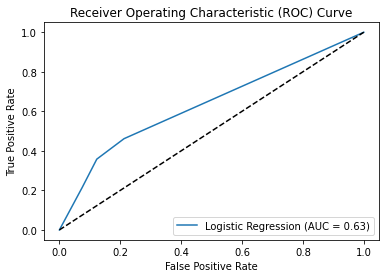

[[246362  66415]
 [   967    829]]


In [37]:
## logit model ##

import statsmodels.api as sm
import numpy as np
XB = df2[['category_shopping_net','category_shopping_pos','category_misc_net']]

# Define the outcome variable
yB = df2[['is_fraud']]

XB_train, XB_test, yB_train, yB_test = train_test_split( XB, yB, test_size=0.30, random_state=185)

smote = SMOTE()
XB_train_resampled, yB_train_resampled = smote.fit_resample(XB_train, yB_train)
model11 = sm.Logit(yB_train_resampled, XB_train_resampled).fit()

report = model11.summary()

print(report)


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import numpy as np
model = LogisticRegression()
model.fit(XB_train_resampled, yB_train_resampled)

# make predictions on test data
y_pred = model.predict(XB_test)





# generate classification report
print(classification_report(yB_test, y_pred))

# generate ROC curve and calculate AUC score
y_prob = model.predict_proba(XB_test)[:, 1]
fpr, tpr, thresholds = roc_curve(yB_test, y_prob)
auc = roc_auc_score(yB_test, y_prob)

# plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(yB_test, y_pred)
print(cm)

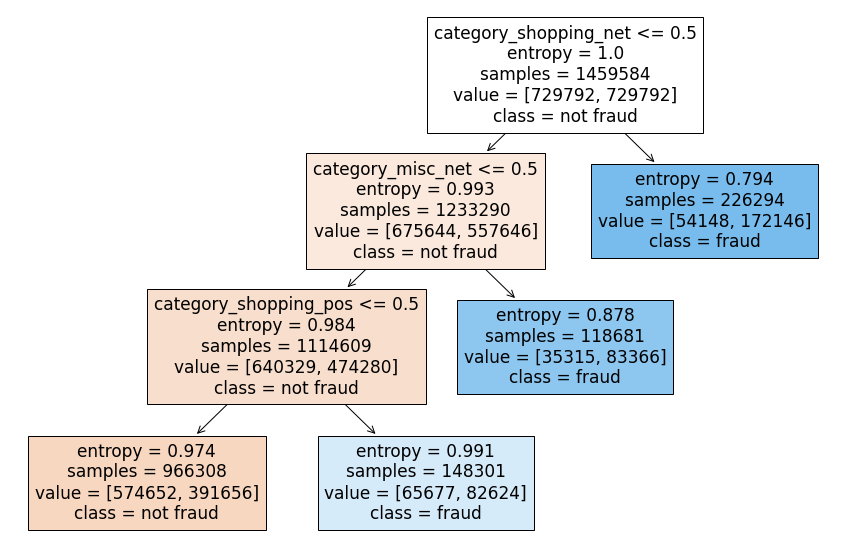

In [38]:
# Fit the decision tree classifier
clf = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
clf.fit(XB_train_resampled,yB_train_resampled)

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=XB.columns, class_names=['not fraud', 'fraud'], filled=True)
plt.show()

In [149]:
## H3: Cities with smaller populations will have higher average amount lost ##

In [39]:

# Creating dummy variables for population_category ## 
df2 =pd.get_dummies(df2,columns=['population_category'])

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Unnamed: 0                1048575 non-null  int64         
 1   trans_date_trans_time     1048575 non-null  datetime64[ns]
 2   cc_num                    1048575 non-null  float64       
 3   merchant                  1048575 non-null  object        
 4   amt                       1048575 non-null  float64       
 5   first                     1048575 non-null  object        
 6   last                      1048575 non-null  object        
 7   street                    1048575 non-null  object        
 8   city                      1048575 non-null  object        
 9   Urban/ Suburban           1048575 non-null  object        
 10  state                     1048575 non-null  object        
 11  zip                       1048575 non-null  int64 

In [41]:
## mean and median calculation ##

mean_df2 = df2.groupby(['is_fraud', 'population_category_low'])['amt'].mean()
mean_df2 = mean_df2.xs(1, level='population_category_low')
print('low mean',mean_df2)

median_df2 = df2.groupby(['is_fraud', 'population_category_low'])['amt'].median()
median_df2 = median_df2.xs(1, level='population_category_low')
print('low median', median_df2)



mean_df2 = df2.groupby(['is_fraud', 'population_category_high'])['amt'].mean()
mean_df2 = mean_df2.xs(1, level='population_category_high')
print('high mean ',mean_df2)

median_df2 = df2.groupby(['is_fraud', 'population_category_high'])['amt'].median()
median_df2 = median_df2.xs(1, level='population_category_high')
print('high median' ,median_df2)



low mean is_fraud
0     67.541169
1    530.121304
Name: amt, dtype: float64
low median is_fraud
0     47.27
1    388.02
Name: amt, dtype: float64
high mean  is_fraud
0     74.380003
1    562.072353
Name: amt, dtype: float64
high median is_fraud
0     44.02
1    711.63
Name: amt, dtype: float64


In [42]:
## chi square and contigency table ##

from scipy.stats import chi2_contingency

# create a contingency table of the counts
contingency_table = pd.pivot_table(df2, index='population_category_low', columns='population_category_high', values='amt', aggfunc='count', fill_value=0)

print(contingency_table)


# conduct the chi-square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# print the results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)
print("Expected counts:", expected)

population_category_high        0      1
population_category_low                 
0                            1669  14557
1                         1032349      0
Chi-square statistic: 939135.0479150638
Degrees of freedom: 1
p-value: 0.0
Expected counts: [[1.60007401e+04 2.25259883e+02]
 [1.01801726e+06 1.43317401e+04]]


Optimization terminated successfully.
         Current function value: 0.692426
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:              1459584
Model:                          Logit   Df Residuals:                  1459582
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 May 2023   Pseudo R-squ.:                0.001041
Time:                        21:45:34   Log-Likelihood:            -1.0107e+06
converged:                       True   LL-Null:                   -1.0117e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
population_category_low    -0.0237      0.002    -13.500      0.000      -0.027   

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.99      0.91      0.95    312777
           1       0.01      0.10      0.01      1796

    accuracy                           0.91    314573
   macro avg       0.50      0.51      0.48    314573
weighted avg       0.99      0.91      0.95    314573



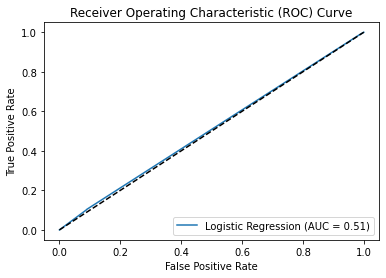

[[284763  28014]
 [  1610    186]]


In [43]:
## logit model ##


XB = df2[['population_category_low','category_shopping_pos']]

# Define the outcome variable
yB = df2[['is_fraud']]

XB_train, XB_test, yB_train, yB_test = train_test_split( XB, yB, test_size=0.30, random_state=185)

smote = SMOTE()
XB_train_resampled, yB_train_resampled = smote.fit_resample(XB_train, yB_train)
model11 = sm.Logit(yB_train_resampled, XB_train_resampled).fit()

report = model11.summary()

print(report)

model = LogisticRegression()
model.fit(XB_train_resampled, yB_train_resampled)

# make predictions on test data
y_pred = model.predict(XB_test)





# generate classification report
print(classification_report(yB_test, y_pred))

# generate ROC curve and calculate AUC score
y_prob = model.predict_proba(XB_test)[:, 1]
fpr, tpr, thresholds = roc_curve(yB_test, y_prob)
auc = roc_auc_score(yB_test, y_prob)

# plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(yB_test, y_pred)
print(cm)

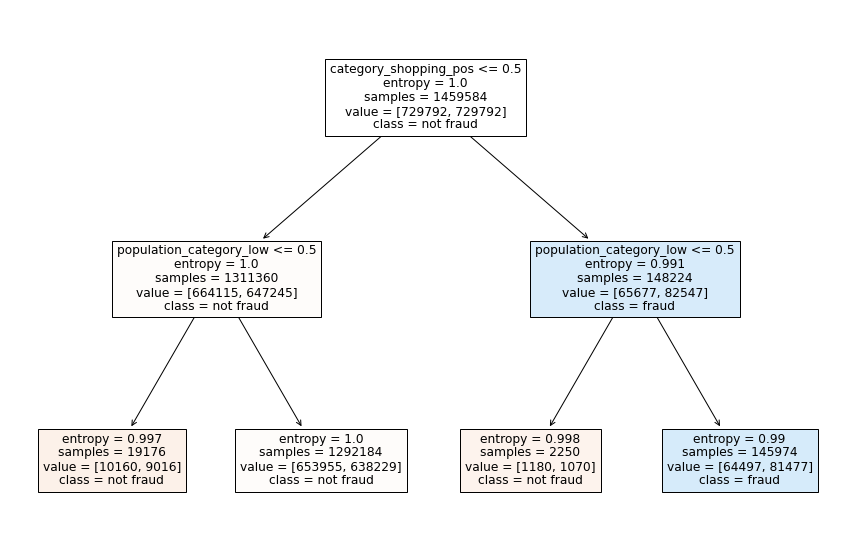

In [44]:
# Fit the decision tree classifier
clf = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
clf.fit(XB_train_resampled,yB_train_resampled)

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=XB.columns, class_names=['not fraud', 'fraud'], filled=True)
plt.show()

In [45]:
## full model 

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Unnamed: 0                1048575 non-null  int64         
 1   trans_date_trans_time     1048575 non-null  datetime64[ns]
 2   cc_num                    1048575 non-null  float64       
 3   merchant                  1048575 non-null  object        
 4   amt                       1048575 non-null  float64       
 5   first                     1048575 non-null  object        
 6   last                      1048575 non-null  object        
 7   street                    1048575 non-null  object        
 8   city                      1048575 non-null  object        
 9   Urban/ Suburban           1048575 non-null  object        
 10  state                     1048575 non-null  object        
 11  zip                       1048575 non-null  int64 

In [47]:

df2['state']=df2['state'].replace(['WA', 'ID', 'MT', 'ND', 'MN', 'WI', 'MI', 'WY', 'NE', 'IA', 'IL','IN', 'OH', 'PA', 'NY', 'VT', 'NH', 'ME'], 'North')
df2['state']=df2['state'].replace(['TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'WV', 'VA', 'NC', 'SC', 'GA', 'FL'], 'South')
df2['state']=df2['state'].replace(['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA','DE', 'MD','DC'], 'East')
df2['state']=df2['state'].replace(['AK', 'HI', 'CA', 'OR', 'WA',' NV', 'UT', 'AZ', 'CO', 'NM', 'WY', 'MT', 'ND', 'SD'], 'West')
df2['state']=df2['state'].replace(['KS','MO','NV'], 'Central')

df2 =pd.get_dummies(df2,columns=['state'])

In [49]:
## logisitc regression ##

XB = df2[['category_shopping_net','category_shopping_pos','category_misc_net','category_entertainment','Urban','Suburban','population_category_low','gender_M',
          'state_East','state_West','state_North','state_South']]

# Define the outcome variable
yB = df2[['is_fraud']]

XB_train, XB_test, yB_train, yB_test = train_test_split( XB, yB, test_size=0.30, random_state=185)

smote = SMOTE()
XB_train_resampled, yB_train_resampled = smote.fit_resample(XB_train, yB_train)
model11 = sm.Logit(yB_train_resampled, XB_train_resampled).fit()

report = model11.summary()
print(report)

model = LogisticRegression()
model.fit(XB_train_resampled, yB_train_resampled.values.ravel())

# make predictions on test data
y_prob = model.predict_proba(XB_test)[:, 1]

# generate classification report
y_pred = model.predict(XB_test)
print(classification_report(yB_test, y_pred))

# generate ROC curve and calculate AUC score
fpr, tpr, thresholds = roc_curve(yB_test, y_prob)
auc = roc_auc_score(yB_test, y_prob)

# plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(yB_test, y_pred)
print(cm)


Optimization terminated successfully.
         Current function value: 0.648829
         Iterations 9


LinAlgError: Singular matrix

In [ ]:
## naive_bayes ##

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.99      0.98      0.99    312777
           1       0.01      0.02      0.01      1796

    accuracy                           0.98    314573
   macro avg       0.50      0.50      0.50    314573
weighted avg       0.99      0.98      0.98    314573



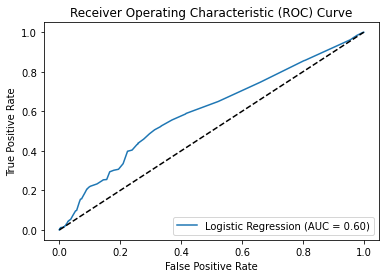

[[307976   4801]
 [  1769     27]]


In [50]:

## ## naive_bayes ## ##

from sklearn.naive_bayes import GaussianNB

XB = df2[['category_shopping_net','category_shopping_pos','category_misc_net','category_entertainment','Urban','Suburban','population_category_low','gender_M',
          'state_East','state_West','state_North','state_South']]

# Define the outcome variable
yB = df2[['is_fraud']]

XB_train, XB_test, yB_train, yB_test = train_test_split( XB, yB, test_size=0.30, random_state=185)


smote = SMOTE()
XB_train_resampled, yB_train_resampled = smote.fit_resample(XB_train, yB_train)


model1 = GaussianNB()

model1.fit(XB_train_resampled, yB_train_resampled)


# make predictions on test data
y_prob = model1.predict_proba(XB_test)[:, 1]

# generate classification report
y_pred = model1.predict(XB_test)
print(classification_report(yB_test, y_pred))

# generate ROC curve and calculate AUC score
fpr, tpr, thresholds = roc_curve(yB_test, y_prob)
auc = roc_auc_score(yB_test, y_prob)

# plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(yB_test, y_pred)
print(cm)


In [51]:
##  DecisionTree ## 

              precision    recall  f1-score   support

           0       1.00      0.80      0.89    312777
           1       0.01      0.45      0.02      1796

    accuracy                           0.80    314573
   macro avg       0.50      0.63      0.46    314573
weighted avg       0.99      0.80      0.88    314573



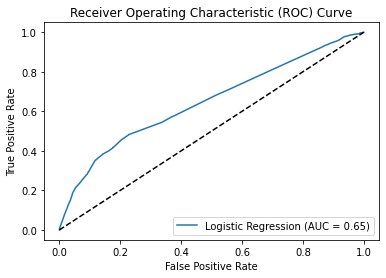

[[249760  63017]
 [   982    814]]


In [52]:


XB = df2[['category_shopping_net','category_shopping_pos','category_misc_net','category_entertainment','Urban','Suburban','population_category_low','gender_M',
          'state_East','state_West','state_North','state_South']]

# Define the outcome variable
yB = df2[['is_fraud']]

XB_train, XB_test, yB_train, yB_test = train_test_split( XB, yB, test_size=0.30, random_state=185)


smote = SMOTE()
XB_train_resampled, yB_train_resampled = smote.fit_resample(XB_train, yB_train)


clf = DecisionTreeClassifier()

clf.fit(XB_train_resampled, yB_train_resampled)


# make predictions on test data
y_prob = clf.predict_proba(XB_test)[:, 1]

# generate classification report
y_pred = clf.predict(XB_test)
print(classification_report(yB_test, y_pred))

# generate ROC curve and calculate AUC score
fpr, tpr, thresholds = roc_curve(yB_test, y_prob)
auc = roc_auc_score(yB_test, y_prob)

# plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(yB_test, y_pred)
print(cm)


In [53]:
## RandomForest ##

C:\Users\kumar\AppData\Local\Temp\ipykernel_4548\3442255376.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(XB_train_resampled, yB_train_resampled)


              precision    recall  f1-score   support

           0       1.00      0.80      0.89    312777
           1       0.01      0.45      0.02      1796

    accuracy                           0.80    314573
   macro avg       0.50      0.63      0.46    314573
weighted avg       0.99      0.80      0.88    314573



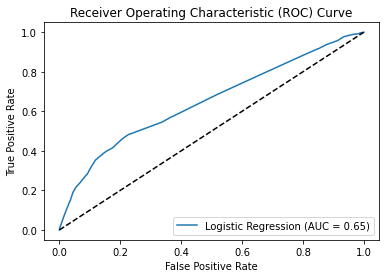

[[249666  63111]
 [   981    815]]


In [54]:


XB = df2[['category_shopping_net','category_shopping_pos','category_misc_net','category_entertainment','Urban','Suburban','population_category_low','gender_M',
          'state_East','state_West','state_North','state_South']]

# Define the outcome variable
yB = df2[['is_fraud']]

XB_train, XB_test, yB_train, yB_test = train_test_split( XB, yB, test_size=0.30, random_state=185)


smote = SMOTE()
XB_train_resampled, yB_train_resampled = smote.fit_resample(XB_train, yB_train)


clf =  RandomForestClassifier()

clf.fit(XB_train_resampled, yB_train_resampled)


# make predictions on test data
y_prob = clf.predict_proba(XB_test)[:, 1]

# generate classification report
y_pred = clf.predict(XB_test)
print(classification_report(yB_test, y_pred))

# generate ROC curve and calculate AUC score
fpr, tpr, thresholds = roc_curve(yB_test, y_prob)
auc = roc_auc_score(yB_test, y_prob)

# plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(yB_test, y_pred)
print(cm)
